In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

import matplotlib.animation as animation
import glob, re

import scienceplots

plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

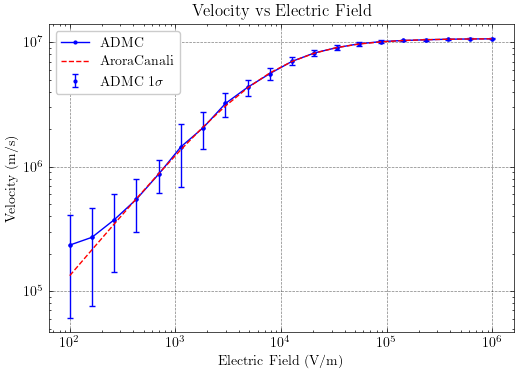

In [3]:
velocity_file = "../build/x_velocity_mean_vs_electric_field.csv"
ElectricField, Velocity, StdVelocity,  AroraCanali = np.loadtxt(velocity_file, delimiter=',', unpack=True, skiprows=1)
fig, axs = plt.subplots(1, 1, figsize=(6, 4))
axs.plot(ElectricField, Velocity, '-o', markersize=2, label="ADMC", color='blue')
axs.errorbar(ElectricField, Velocity, yerr=StdVelocity, fmt='o', markersize=2, barsabove=True, color='blue', capthick=1, capsize=2, label="ADMC $1\sigma$")


axs.plot(ElectricField, AroraCanali, markersize=2, label="AroraCanali", color='red', linestyle='dashed')
axs.legend()

axs.set_xlabel("Electric Field (V/m)")
axs.set_ylabel("Velocity (m/s)")
axs.set_title("Velocity vs Electric Field")
axs.set_yscale('log')
axs.set_xscale('log')

Text(0.5, 1.0, 'Impact Ionization Rate vs Electric Field')

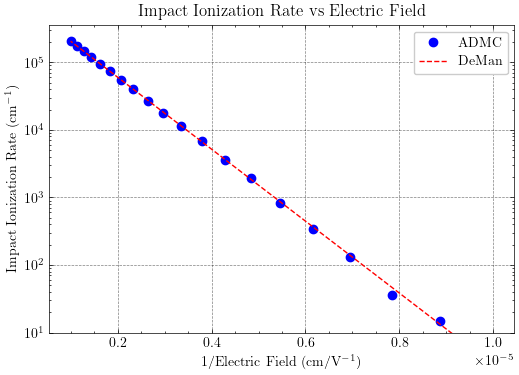

In [4]:
impact_ionization_file = "../build/impact_ionization_rate_vs_electric_field.csv"
ElectricField, ImpactIonizationRate, DeManTheory = np.loadtxt(impact_ionization_file, delimiter=',', unpack=True, skiprows=1)
InverseEF = 1.0/ElectricField
fig, axs = plt.subplots(1, 1, figsize=(6, 4))
axs.plot(InverseEF, ImpactIonizationRate, 'o', label="ADMC", color='blue')
axs.plot(InverseEF, DeManTheory, markersize=2, label="DeMan", color='red', linestyle='dashed')
axs.legend()
axs.set_yscale('log')
axs.set_ylim(bottom=1e1)


axs.set_xlabel("1/Electric Field (cm/V$^{-1}$)")
axs.set_ylabel("Impact Ionization Rate (cm$^{-1}$)")
axs.set_title("Impact Ionization Rate vs Electric Field")

Text(0.5, 1.0, 'Hole Impact Ionization Rate vs Electric Field')

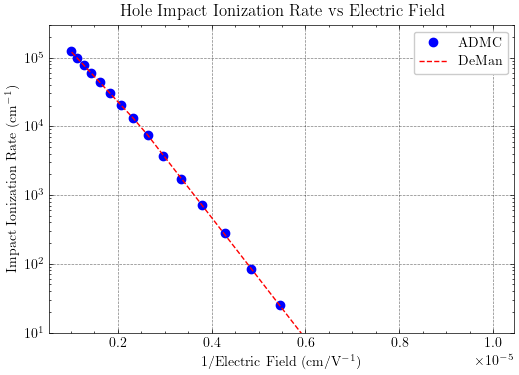

In [5]:
impact_ionization_file = "../build/hole_impact_ionization_rate_vs_electric_field.csv"
hElectricField, hImpactIonizationRate, hDeManTheory = np.loadtxt(impact_ionization_file, delimiter=',', unpack=True, skiprows=1)
hInverseEF = 1.0/hElectricField
fig, axs = plt.subplots(1, 1, figsize=(6, 4))
axs.plot(hInverseEF, hImpactIonizationRate, 'o', label="ADMC", color='blue')
axs.plot(hInverseEF, hDeManTheory, markersize=2, label="DeMan", color='red', linestyle='dashed')
axs.legend()
axs.set_yscale('log')
axs.set_ylim(bottom=1e1)

axs.set_xlabel("1/Electric Field (cm/V$^{-1}$)")
axs.set_ylabel("Impact Ionization Rate (cm$^{-1}$)")
axs.set_title("Hole Impact Ionization Rate vs Electric Field")

Mobility: 4.02e+02 m^2/(V*s)
Diffusion coefficient: 1.04e+01 m^2/s


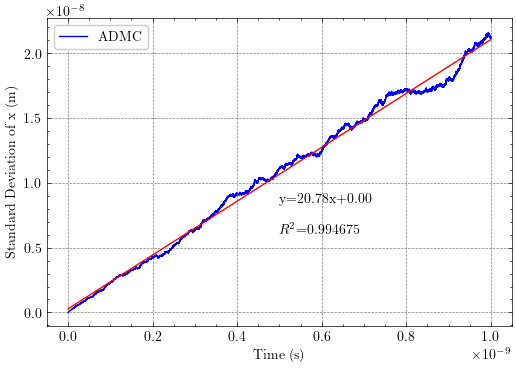

In [25]:
file_diffusion = "../build/std_xVStime.csv"
time, std_x = np.loadtxt(file_diffusion, delimiter=',', unpack=True, skiprows=1)
std_x *= 1e-4

fig, axs = plt.subplots(1, 1, figsize=(6, 4))
axs.plot(time, std_x**2, '-', label="ADMC", color='blue')
axs.legend()

axs.set_xlabel("Time (s)")
axs.set_ylabel("Standard Deviation of x (m)")

# Linear fit
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(time, std_x**2)
axs.plot(time, intercept + slope*time, 'r', label='fitted line')
axs.text(0.5, 0.4, f"y={slope:.2f}x+{intercept:.2f}", transform=axs.transAxes)
axs.text(0.5, 0.3, f"$R^2$={r_value**2:.6f}", transform=axs.transAxes)

T = 300.0
kB = 1.38064852e-23
q = 1.60217662e-19

mobility = slope/(2*T*kB/q)

print(f"Mobility: {mobility:.2e} m^2/(V*s)")

print(f"Diffusion coefficient: {slope/2:.2e} m^2/s")